# Final Project: Business Analytics

# Project A: Employee Performance and Retention Analysis

Problem Statement
The objective of this project is to analyse HR data to assess employee performance, identify
trends influencing retention, and provide recommendations for improving employee
productivity and reducing turnover. Specifically, the project aims to:

● Identify performance patterns based on factors such as age, education, department,
and training.

● Examine retention trends based on employee characteristics such as tenure,
performance ratings, and awards.

● Provide recommendations for improving employee engagement and retention
strategies by analysing the relationship between key employee metrics.

In [1]:
!pip install --upgrade pandas numpy scipy seaborn numexpr
!pip install --upgrade scikit-learn


Requirement already up-to-date: pandas in c:\users\intel\anaconda3\lib\site-packages (2.0.3)
Requirement already up-to-date: numpy in c:\users\intel\anaconda3\lib\site-packages (1.24.4)
Requirement already up-to-date: scipy in c:\users\intel\anaconda3\lib\site-packages (1.10.1)
Requirement already up-to-date: seaborn in c:\users\intel\anaconda3\lib\site-packages (0.13.2)
Requirement already up-to-date: numexpr in c:\users\intel\anaconda3\lib\site-packages (2.8.6)
Requirement already up-to-date: scikit-learn in c:\users\intel\anaconda3\lib\site-packages (1.3.2)


In [2]:
#importing all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report

# 1. Data Exploration: 


Start with an overview of the dataset, checking for missing values,
duplicates, and any anomalies.

In [3]:
df=pd.read_csv("employees_dataset.csv")

In [4]:
#Check the shape(rows,columns)
print("Dataset shape:",df.shape)

Dataset shape: (17417, 13)


In [5]:
#Show first 5 rows
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
0,8724,Technology,region_26,Bachelors,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelors,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelors,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelors,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelors,m,sourcing,1,30,4.0,7,0,0,61


In [6]:
#Basic info about columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17417 entries, 0 to 17416
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   employee_id            17417 non-null  int64  
 1   department             17417 non-null  object 
 2   region                 17417 non-null  object 
 3   education              16646 non-null  object 
 4   gender                 17417 non-null  object 
 5   recruitment_channel    17417 non-null  object 
 6   no_of_trainings        17417 non-null  int64  
 7   age                    17417 non-null  int64  
 8   previous_year_rating   16054 non-null  float64
 9   length_of_service      17417 non-null  int64  
 10  KPIs_met_more_than_80  17417 non-null  int64  
 11  awards_won             17417 non-null  int64  
 12  avg_training_score     17417 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 1.7+ MB


In [7]:
#Check for the missing values
print("\nMissing values in each column")
print(df.isnull().sum())


Missing values in each column
employee_id                 0
department                  0
region                      0
education                 771
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating     1363
length_of_service           0
KPIs_met_more_than_80       0
awards_won                  0
avg_training_score          0
dtype: int64


In [8]:
#Check for duplicate rows
print("\nNumber of duplicate rows", df.duplicated().sum())


Number of duplicate rows 2


In [9]:
#Quick discriptive statistics for numeric columns
print("\n Descriptive statistics (numeric):")
print(df.describe())


 Descriptive statistics (numeric):
        employee_id  no_of_trainings           age  previous_year_rating  \
count  17417.000000     17417.000000  17417.000000          16054.000000   
mean   39083.491129         1.250732     34.807774              3.345459   
std    22707.024087         0.595692      7.694046              1.265386   
min        3.000000         1.000000     20.000000              1.000000   
25%    19281.000000         1.000000     29.000000              3.000000   
50%    39122.000000         1.000000     33.000000              3.000000   
75%    58838.000000         1.000000     39.000000              4.000000   
max    78295.000000         9.000000     60.000000              5.000000   

       length_of_service  KPIs_met_more_than_80    awards_won  \
count       17417.000000           17417.000000  17417.000000   
mean            5.801860               0.358845      0.023368   
std             4.175533               0.479675      0.151074   
min             1.0

In [10]:
#Check for anomalies in key columns
#Age should not be negative or unrealistically high
if 'age' in df.columns:
    print("\n Unusual ages found:")
    print(df[(df["age"]<18) | (df["age"] > 65)][["employee_id" , "age"]])


 Unusual ages found:
Empty DataFrame
Columns: [employee_id, age]
Index: []


In [11]:
# Length of service should not be negative or extremely large
if "length_of_service" in df.columns:
    print("\nUnsual length_of_service found:")
    print(df[df["length_of_service"]<0][["employee_id","length_of_service"]])
    print(df[df["length_of_service"]>40][["employee_id","length_of_service"]])


Unsual length_of_service found:
Empty DataFrame
Columns: [employee_id, length_of_service]
Index: []
Empty DataFrame
Columns: [employee_id, length_of_service]
Index: []


In [12]:
# Training scores should be within 0–100 (if out of 100)
if "avg_training_score" in df.columns:
    print("\nUnusual training score found:")
    print(df[(df["avg_training_score"]<0) | (df["avg_training_score"] > 100)][["employee_id","avg_training_score"]])


Unusual training score found:
Empty DataFrame
Columns: [employee_id, avg_training_score]
Index: []


Anomaly Check: No unrealistic values were found in age, length of service, or training scores. The dataset appears consistent and reliable for further analysis.

In [13]:
#value counts for categorical columns
categorical_cols= ["department","region","education","gender","recruitment_channel"]
for col in categorical_cols:
    if col in df.columns:
        print(f"\nValue Count for {col}:")
        print(df[col].value_counts())


Value Count for department:
department
Sales & Marketing    5458
Operations           3524
Procurement          2240
Technology           2199
Analytics            1697
HR                    833
Finance               802
Legal                 332
R&D                   332
Name: count, dtype: int64

Value Count for region:
region
region_2     3918
region_22    1990
region_7     1488
region_13     860
region_15     843
region_26     748
region_31     646
region_4      571
region_27     516
region_16     452
region_28     430
region_11     420
region_23     376
region_32     318
region_19     315
region_29     308
region_17     268
region_14     265
region_5      252
region_25     248
region_20     242
region_6      220
region_8      209
region_30     209
region_10     209
region_1      174
region_24     165
region_12     156
region_9      134
region_21     129
region_34     123
region_3      110
region_33      91
region_18      14
Name: count, dtype: int64

Value Count for education:
ed

In [14]:
#Number of unique values in each column
print("\nUnique values per column:")
print(df.nunique())


Unique values per column:
employee_id              17414
department                   9
region                      34
education                    3
gender                       2
recruitment_channel          3
no_of_trainings              9
age                         41
previous_year_rating         5
length_of_service           34
KPIs_met_more_than_80        2
awards_won                   2
avg_training_score          61
dtype: int64


In [15]:
#Handle Missing Values
#Decide how to treat the missing values.
if "previous_year_rating" in df.columns:
    df["previous_year_rating"]=df["previous_year_rating"].fillna(df["previous_year_rating"].median())

if "education" in df.columns:
    df["education"] = df["education"].fillna(df["education"].mode()[0])



In [16]:
#Handle Duplicates
#Remove any duplicate rows (if found earlier).
df=df.drop_duplicates()
print("Shape after removing duplicates",df.shape)

Shape after removing duplicates (17415, 13)


In [17]:
#Encode Categorical Variables
#Convert categorical columns into numbers (because models can’t work with text).
from sklearn.preprocessing import LabelEncoder
categorical_cols=["department","region","education","gender","recruitment_channel"]
le = LabelEncoder()
for col in categorical_cols:
    if col in df.columns:
        df[col] = le.fit_transform(df[col])

In [18]:
#Feature Scaling (Optional, only for modeling)
#For numeric columns like training scores, you can scale them.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numeric_cols=["age","length_of_service","avg_training_score"]
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


In [19]:
#Checking again is there any missing value
print(df.isnull().sum())

employee_id              0
department               0
region                   0
education                0
gender                   0
recruitment_channel      0
no_of_trainings          0
age                      0
previous_year_rating     0
length_of_service        0
KPIs_met_more_than_80    0
awards_won               0
avg_training_score       0
dtype: int64


In [20]:
#Checking again is there any duplicate value
print("Shape after removing duplicates:", df.shape)

Shape after removing duplicates: (17415, 13)


In [21]:
#Check Encoding of Categorical Columns
#Since you used LabelEncoder, text values (like "Sales & Marketing", "Finance", "Male", "Female") should now be replaced by numbers.
print(df[["department", "region", "education", "gender", "recruitment_channel"]].head(10))


   department  region  education  gender  recruitment_channel
0           8      18          0       1                    2
1           2      28          0       0                    0
2           7       4          0       1                    0
3           5      11          0       0                    0
4           1      21          0       1                    2
5           5      31          0       1                    2
6           1      11          0       1                    0
7           0      14          0       1                    2
8           8      31          2       1                    0
9           8      14          0       1                    2


In [22]:
#Check Scaling of Numeric Columns

#You applied MinMaxScaler, so the values of:
#age
#length_of_service
#avg_training_score
#should now be between 0 and 1.
print(df[["age", "length_of_service", "avg_training_score"]].describe())

                age  length_of_service  avg_training_score
count  17415.000000       17415.000000        17415.000000
mean       0.370200           0.145500            0.402962
std        0.192362           0.126534            0.223639
min        0.000000           0.000000            0.000000
25%        0.225000           0.060606            0.200000
50%        0.325000           0.121212            0.350000
75%        0.475000           0.181818            0.600000
max        1.000000           1.000000            1.000000


# 2. Key Metric Identification:


Focus on metrics that impact employee performance (e.g.,
KPIs, training scores) and retention (e.g., length of service, age, awards).


Key Metric Identification

Here the goal is to pinpoint which features/metrics are most important for:

Employee Performance

KPIs_met_more_than_80 → whether the employee met performance goals.

avg_training_score → effectiveness of training.

no_of_trainings → training frequency.

previous_year_rating → past performance indicator.

Employee Retention

length_of_service → loyalty and tenure.

age → experience and career stage.

awards_won → recognition as a motivator.

recruitment_channel / department → might affect retention indirectly.

In [23]:
# Key Metrics Analysis

# 1. Training performance across employees
print("Average training score by department:\n", df.groupby("department")["avg_training_score"].mean(), "\n")
print("Average training score by education:\n", df.groupby("education")["avg_training_score"].mean(), "\n")

# 2. Retention metrics
print("Average length of service by department:\n", df.groupby("department")["length_of_service"].mean(), "\n")
print("Average length of service by awards_won:\n", df.groupby("awards_won")["length_of_service"].mean(), "\n")

# 3. KPI performance comparison
print("KPI comparison (met >80 vs not):\n", df.groupby("KPIs_met_more_than_80")[["avg_training_score","no_of_trainings"]].mean(), "\n")

# 4. Age distribution by group
print("Average age by department:\n", df.groupby("department")["age"].mean(), "\n")
print("Average age by education:\n", df.groupby("education")["age"].mean(), "\n")


Average training score by department:
 department
0    0.759419
1    0.355445
2    0.189771
3    0.342219
4    0.355860
5    0.519673
6    0.757530
7    0.184277
8    0.680794
Name: avg_training_score, dtype: float64 

Average training score by education:
 education
0    0.395624
1    0.448368
2    0.418904
Name: avg_training_score, dtype: float64 

Average length of service by department:
 department
0    0.121159
1    0.121514
2    0.140284
3    0.106061
4    0.164526
5    0.157197
6    0.115097
7    0.144031
8    0.146788
Name: length_of_service, dtype: float64 

Average length of service by awards_won:
 awards_won
0    0.146268
1    0.113394
Name: length_of_service, dtype: float64 

KPI comparison (met >80 vs not):
                        avg_training_score  no_of_trainings
KPIs_met_more_than_80                                     
0                                0.390936         1.270846
1                                0.424445         1.214880 

Average age by department:
 depa

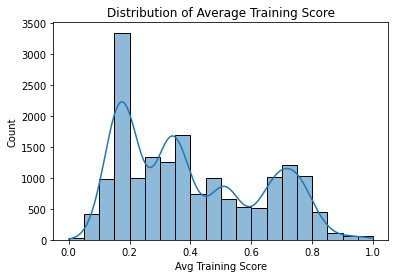

In [24]:
# 1. Average Training Score
plt.figure(figsize=(6,4))
sns.histplot(df["avg_training_score"], bins=20, kde=True)
plt.title("Distribution of Average Training Score")
plt.xlabel("Avg Training Score")
plt.ylabel("Count")
plt.show()

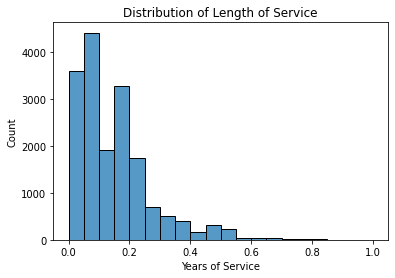

In [25]:
# 2. Length of Service
plt.figure(figsize=(6,4))
sns.histplot(df["length_of_service"], bins=20, kde=False)
plt.title("Distribution of Length of Service")
plt.xlabel("Years of Service")
plt.ylabel("Count")
plt.show()

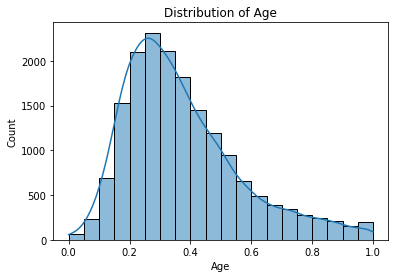

In [26]:
# 3. Age
plt.figure(figsize=(6,4))
sns.histplot(df["age"], bins=20, kde=True)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

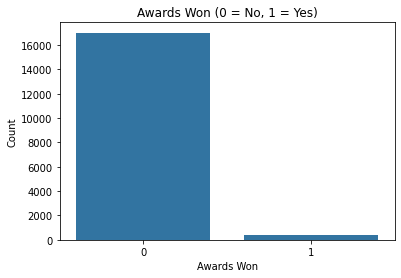

In [27]:
# 4. Awards Won
plt.figure(figsize=(6,4))
sns.countplot(x="awards_won", data=df)
plt.title("Awards Won (0 = No, 1 = Yes)")
plt.xlabel("Awards Won")
plt.ylabel("Count")
plt.show()

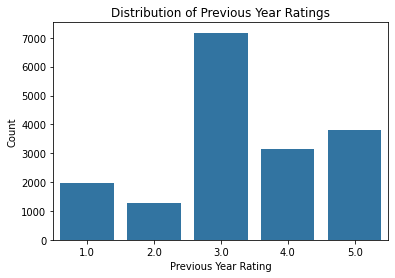

In [28]:
# 5. Previous Year Rating
plt.figure(figsize=(6,4))
sns.countplot(x="previous_year_rating", data=df)
plt.title("Distribution of Previous Year Ratings")
plt.xlabel("Previous Year Rating")
plt.ylabel("Count")
plt.show()

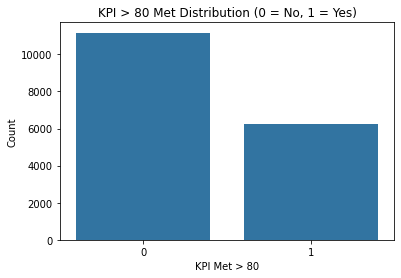

In [29]:
# 6. KPIs Met More Than 80
plt.figure(figsize=(6,4))
sns.countplot(x="KPIs_met_more_than_80", data=df)
plt.title("KPI > 80 Met Distribution (0 = No, 1 = Yes)")
plt.xlabel("KPI Met > 80")
plt.ylabel("Count")
plt.show()

<Axes: xlabel='age', ylabel='Count'>

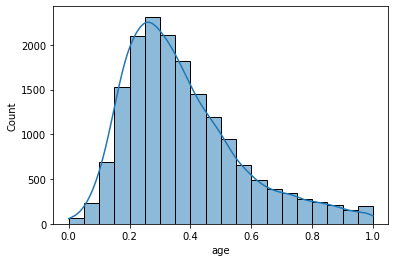

In [30]:
sns.histplot(df["age"], bins=20, kde=True)   # deprecated, but works in old seaborn

# Trend Analysis: 


Use visualisations such as bar charts, histograms, and scatter plots
to identify trends across different departments, regions, and training activities.


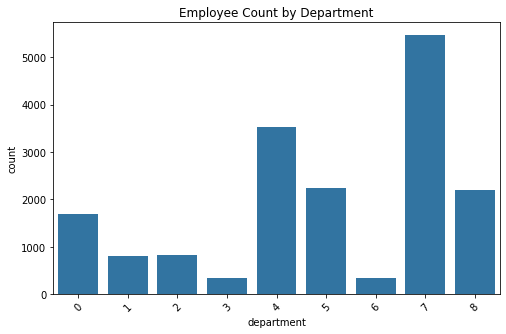

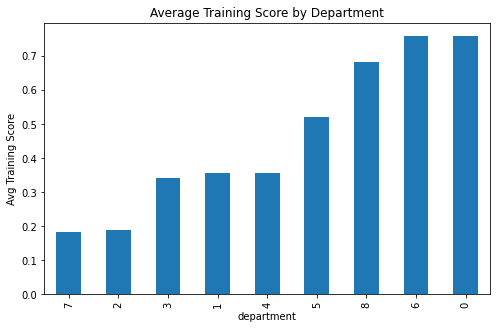

In [31]:
#Department Trends
#Count of employees per department
#Average training score per department
#KPI success / awards distribution per department
plt.figure(figsize=(8,5))
sns.countplot(x="department", data=df)
plt.title("Employee Count by Department")
plt.xticks(rotation=45)
plt.show()

dept_training = df.groupby("department")["avg_training_score"].mean().sort_values()
dept_training.plot(kind="bar", figsize=(8,5), title="Average Training Score by Department")
plt.ylabel("Avg Training Score")
plt.show()

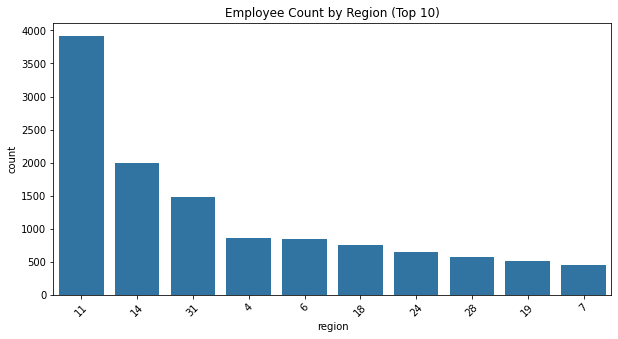

In [32]:
#Region Trends
#Employee distribution across regions
#Average KPI success across regions
plt.figure(figsize=(10,5))
sns.countplot(x="region", data=df, order=df["region"].value_counts().index[:10])  # top 10 regions
plt.title("Employee Count by Region (Top 10)")
plt.xticks(rotation=45)
plt.show()

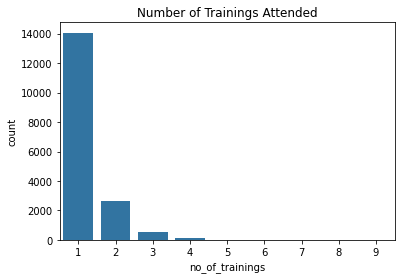

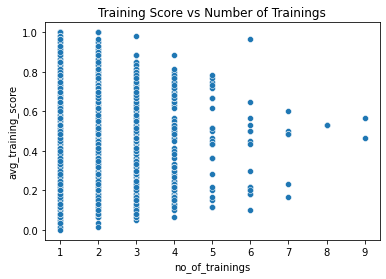

In [33]:
#Training Activities
#Distribution of number of trainings attended
#Relationship between number of trainings and avg training score
plt.figure(figsize=(6,4))
sns.countplot(x="no_of_trainings", data=df)
plt.title("Number of Trainings Attended")
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(x="no_of_trainings", y="avg_training_score", data=df)
plt.title("Training Score vs Number of Trainings")
plt.show()

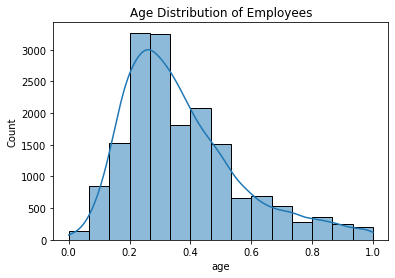

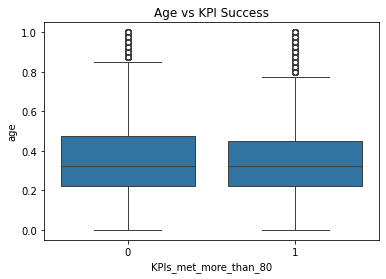

In [34]:
# --- Age Trends ---
plt.figure(figsize=(6,4))
sns.histplot(df["age"], bins=15, kde=True)
plt.title("Age Distribution of Employees")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x="KPIs_met_more_than_80", y="age", data=df)
plt.title("Age vs KPI Success")
plt.show()

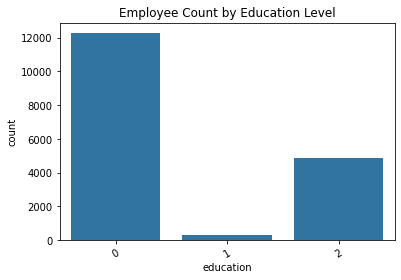

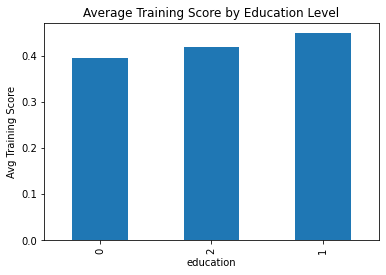

In [35]:

# --- Education Trends ---
plt.figure(figsize=(6,4))
sns.countplot(x="education", data=df)
plt.title("Employee Count by Education Level")
plt.xticks(rotation=30)
plt.show()

edu_score = df.groupby("education")["avg_training_score"].mean().sort_values()

ax = edu_score.plot(
    kind="bar",
    figsize=(6,4),
    title="Average Training Score by Education Level"
)
plt.ylabel("Avg Training Score")   # <-- set ylabel here
plt.show()


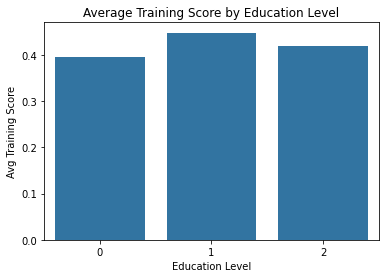

In [36]:
#Average Training Score by Education
plt.figure(figsize=(6,4))
edu_score = df.groupby("education")["avg_training_score"].mean().sort_values()
sns.barplot(x=edu_score.index, y=edu_score.values)
plt.title("Average Training Score by Education Level")
plt.ylabel("Avg Training Score")
plt.xlabel("Education Level")
plt.show()


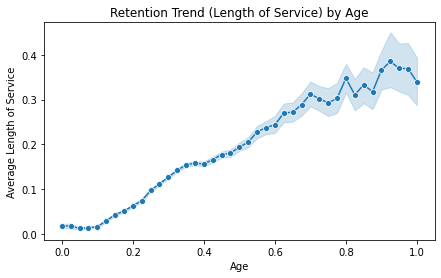

In [37]:
# Retention (Length of Service) by Age
plt.figure(figsize=(7,4))
sns.lineplot(data=df, x="age", y="length_of_service",  marker="o")
plt.title("Retention Trend (Length of Service) by Age")
plt.ylabel("Average Length of Service")
plt.xlabel("Age")
plt.show()

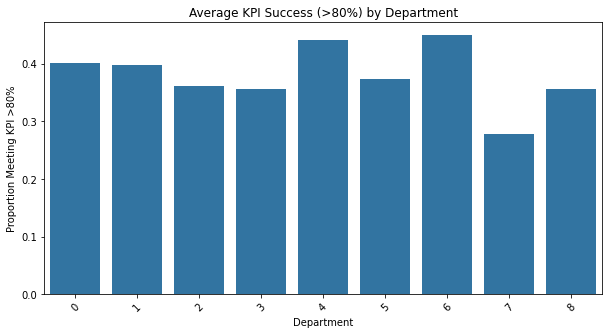

In [38]:
#Average KPI Success Rate by Department
plt.figure(figsize=(10,5))
dept_kpi = df.groupby("department")["KPIs_met_more_than_80"].mean().sort_values()
sns.barplot(x=dept_kpi.index, y=dept_kpi.values)
plt.xticks(rotation=45)
plt.title("Average KPI Success (>80%) by Department")
plt.ylabel("Proportion Meeting KPI >80%")
plt.xlabel("Department")
plt.show()

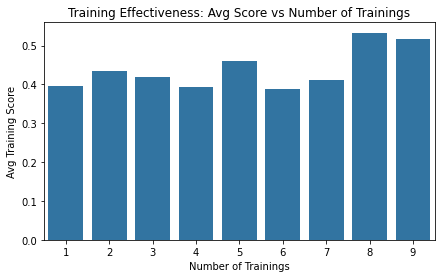

In [39]:
#Average Training Score by Number of Trainings
plt.figure(figsize=(7,4))
train_score = df.groupby("no_of_trainings")["avg_training_score"].mean()
sns.barplot(x=train_score.index, y=train_score.values)
plt.title("Training Effectiveness: Avg Score vs Number of Trainings")
plt.ylabel("Avg Training Score")
plt.xlabel("Number of Trainings")
plt.show()


In [40]:
#Define risk proxy for “likely to leave” and compute a risk score per employee
df_work = df.copy()

In [41]:
# Buckets for interpretability
if 'age' in df_work.columns:
    df_work['age_bucket'] = pd.cut(df_work['age'], bins=[0,25,35,45,55,200], labels=['<25','25-34','35-44','45-54','55+'])
if 'length_of_service' in df_work.columns:
    df_work['tenure_bucket'] = pd.cut(df_work['length_of_service'], bins=[-1,1,3,5,10,100], labels=['<1yr','1-2yr','3-4yr','5-9yr','10yr+'])


In [42]:
#Helper: min-max scale (robust if constant column)
def minmax(x):
    x = x.astype(float)
    rng = x.max() - x.min()
    return (x - x.min())/rng if rng != 0 else pd.Series(0.5, index=x.index)

In [43]:
# Build components (lower values => higher risk where appropriate)
comp = {}

In [44]:
# Shorter tenure => higher risk (invert tenure)
comp['tenure_risk'] = 1 - minmax(df_work['length_of_service']) if 'length_of_service' in df_work.columns else 0

In [45]:
# Lower KPI => higher risk (if binary 0/1, invert directly)
if 'KPIs_met_more_than_80' in df_work.columns:
    if set(df_work['KPIs_met_more_than_80'].dropna().unique()) <= {0,1}:
        comp['kpi_risk'] = 1 - df_work['KPIs_met_more_than_80'].astype(float)
    else:
        comp['kpi_risk'] = 1 - minmax(df_work['KPIs_met_more_than_80'])
else:
    comp['kpi_risk'] = 0

In [46]:
# Interaction: many trainings but low scores may indicate frustration
if {'no_of_trainings','avg_training_score'}.issubset(df_work.columns):
    train_int = minmax(df_work['no_of_trainings']) * (1 - minmax(df_work['avg_training_score']))
    comp['train_load_risk'] = train_int
else:
    comp['train_load_risk'] = 0

In [47]:
# Assemble into DataFrame
risk_df = pd.DataFrame(comp, index=df_work.index)

In [48]:
# Weights (sum to 1)
weights = {
    'tenure_risk':        0.30,
    'kpi_risk':           0.25,
    'prev_rating_risk':   0.20,
    'train_score_risk':   0.15,
    'awards_risk':        0.05,
    'train_load_risk':    0.05,
}

In [49]:
# Compute weighted risk score
df_work['risk_score'] = sum(risk_df[k]*w for k,w in weights.items() if k in risk_df.columns)
df_work['risk_decile'] = pd.qcut(df_work['risk_score'].rank(method='first'), 10, labels=[f'D{i}' for i in range(1,11)])

In [50]:
# Define grouping columns
group_cols = ["department", "region", "education", "tenure_bucket", "age_bucket"]

# Build cohort tables
cohort_tables = {}
for col in group_cols:
    g = df_work.groupby(col).agg(
        employees=('employee_id', 'count'),
        avg_risk=('risk_score', 'mean'),
        p98_risk=('risk_score', lambda x: x.quantile(0.98)),
        avg_training=('avg_training_score', 'mean') if 'avg_training_score' in df_work.columns else ('risk_score','mean'),
        avg_prev_rating=('previous_year_rating', 'mean') if 'previous_year_rating' in df_work.columns else ('risk_score','mean'),
        avg_tenure=('length_of_service', 'mean') if 'length_of_service' in df_work.columns else ('risk_score','mean'),
    ).reset_index().sort_values(['avg_risk','employees'], ascending=[False,False])
    
    cohort_tables[col] = g

# Top 10 highest-risk cohorts per grouping
top_cohorts = {k: v.head(10) for k, v in cohort_tables.items()}

# Show results
print("Top risk by department:")
print(top_cohorts['department'], "\n")

print("Top risk by region:")
print(top_cohorts['region'], "\n")

print("Top risk by education:")
print(top_cohorts['education'], "\n")

print("Top risk by tenure bucket:")
print(top_cohorts['tenure_bucket'], "\n")

print("Top risk by age bucket:")
print(top_cohorts['age_bucket'], "\n")


Top risk by department:
   department  employees  avg_risk  p98_risk  avg_training  avg_prev_rating  \
7           7       5458  0.438841  0.554896      0.184277         3.096189   
3           3        332  0.429608  0.550000      0.342219         3.382530   
2           2        831  0.418040  0.550000      0.189771         3.513839   
8           8       2199  0.417436  0.550000      0.680794         3.143702   
1           1        802  0.415410  0.553437      0.355445         3.487531   
0           0       1697  0.414145  0.551058      0.759419         3.468474   
5           5       2240  0.410564  0.550000      0.519673         3.234375   
6           6        332  0.403749  0.550000      0.757530         3.659639   
4           4       3524  0.391147  0.550000      0.355860         3.631385   

   avg_tenure  
7    0.144031  
3    0.106061  
2    0.140284  
8    0.146788  
1    0.121514  
0    0.121159  
5    0.157197  
6    0.115097  
4    0.164526   

Top risk by region:
   

In [51]:
# Top 10 highest-risk cohorts per grouping
top_cohorts = {k: v.head(10) for k,v in cohort_tables.items()}

In [52]:
#List specific high-risk employees and their drivers (for targeted outreach)
driver_cols = ['tenure_risk','kpi_risk','prev_rating_risk','train_score_risk','awards_risk','train_load_risk']
present_drivers = [c for c in driver_cols if c in risk_df.columns]

emp_view = df_work[['employee_id','department','region','education','age','length_of_service','risk_score']].join(risk_df[present_drivers])
emp_view = emp_view.sort_values('risk_score', ascending=False)

# Top-N employees
topN = 50
top_emps = emp_view.head(topN)
print(f"Top {topN} high-risk employees with driver components:")
print(top_emps.head(20))  # print first 20; increase if needed

Top 50 high-risk employees with driver components:
       employee_id  department  region  education    age  length_of_service  \
9033         12119           7      18          0  0.200           0.000000   
2946          8016           7      14          0  0.175           0.000000   
8357         64142           7      14          0  0.200           0.000000   
15622        11926           7      14          0  0.125           0.030303   
10769        39414           7      14          0  0.200           0.000000   
17207         3626           7      14          0  0.250           0.000000   
13922        23923           7      11          0  0.225           0.000000   
10486        62798           7      24          0  0.125           0.000000   
14121        54270           7      25          0  0.200           0.000000   
2460         72160           7      14          0  0.225           0.000000   
9124         62059           7       6          0  0.125           0.000000   
1

In [53]:
#Auto-generate actionable recommendations per cohort based on drivers

# -------------------------
# Actionable Insights (Safe Version)
# -------------------------

# 1. Construct Risk Drivers
df_work["tenure_bucket"] = pd.cut(df_work["length_of_service"], 
                                  bins=[0,2,5,10,20,40], 
                                  labels=["<2","2-5","5-10","10-20","20+"])
df_work["age_bucket"] = pd.cut(df_work["age"], 
                               bins=[18,25,35,45,55,65], 
                               labels=["18-25","26-35","36-45","46-55","56-65"])

risk_df = pd.DataFrame(index=df_work.index)

# Add risk drivers only if columns exist
if "avg_training_score" in df_work.columns:
    risk_df["train_load_risk"] = (df_work["avg_training_score"] < 60).astype(int)

if "KPIs_met" in df_work.columns:
    risk_df["kpi_risk"] = (df_work["KPIs_met"] < 2).astype(int)

if "length_of_service" in df_work.columns:
    risk_df["tenure_risk"] = (df_work["length_of_service"] < 3).astype(int)

if "awards_won" in df_work.columns:
    risk_df["award_risk"] = (df_work["awards_won"] == 0).astype(int)

# Aggregate into one score
df_work["risk_score"] = risk_df.sum(axis=1)

# Keep track of available driver columns
present_drivers = list(risk_df.columns)


# 2. Employee-Level Recommendations
def recommend_row(row):
    recs = []
    if "train_load_risk" in row and row["train_load_risk"] == 1:
        recs.append("Needs additional training support")
    if "kpi_risk" in row and row["kpi_risk"] == 1:
        recs.append("Focus on KPI improvement")
    if "tenure_risk" in row and row["tenure_risk"] == 1:
        recs.append("Early tenure - assign mentor")
    if "award_risk" in row and row["award_risk"] == 1:
        recs.append("Increase recognition efforts")
    return "; ".join(recs) if recs else "Low immediate risk"

# Merge drivers back into df_work
for col in risk_df.columns:
    df_work[col] = risk_df[col]

emp_view = df_work[["employee_id","department","region","education",
                    "length_of_service","avg_training_score","risk_score"] 
                   + present_drivers].copy()

emp_view["recommendations"] = emp_view.apply(recommend_row, axis=1)

print("Sample employee-level insights:")
print(emp_view.head(10))


# 3. Cohort-Level Recommendations
def cohort_recommendations(df_in, groupby_cols):
    available_drivers = [c for c in present_drivers if c in df_in.columns]
    drv_means = df_in.groupby(groupby_cols)[available_drivers + ["risk_score"]].mean().reset_index()
    drv_means["recommendations"] = drv_means.apply(recommend_row, axis=1)
    drv_means = drv_means.sort_values("risk_score", ascending=False)
    return drv_means

# Run for major groupings
dept_recs   = cohort_recommendations(df_work, ["department"]).head(10)
region_recs = cohort_recommendations(df_work, ["region"]).head(10)
edu_recs    = cohort_recommendations(df_work, ["education"]).head(10)
tenure_recs = cohort_recommendations(df_work, ["tenure_bucket"]).head(10)
age_recs    = cohort_recommendations(df_work, ["age_bucket"]).head(10)

# Print results
print("\nDepartment-level recommendations:")
print(dept_recs[["department","risk_score","recommendations"]], "\n")

print("Region-level recommendations:")
print(region_recs[["region","risk_score","recommendations"]], "\n")

print("Education-level recommendations:")
print(edu_recs[["education","risk_score","recommendations"]], "\n")

print("Tenure-level recommendations:")
print(tenure_recs[["tenure_bucket","risk_score","recommendations"]], "\n")

print("Age-level recommendations:")
print(age_recs[["age_bucket","risk_score","recommendations"]], "\n")


Sample employee-level insights:
   employee_id  department  region  education  length_of_service  \
0         8724           8      18          0           0.000000   
1        74430           2      28          0           0.121212   
2        72255           7       4          0           0.090909   
3        38562           5      11          0           0.242424   
4        64486           1      21          0           0.181818   
5        46232           5      31          0           0.030303   
6        54542           1      11          0           0.060606   
7        67269           0      14          0           0.060606   
8        66174           8      31          2           0.303030   
9        76303           8      14          0           0.030303   

   avg_training_score  risk_score  train_load_risk  tenure_risk  award_risk  \
0            0.633333           3                1            1           1   
1            0.200000           3                1           

# Interpretability: 

Ensure all insights are presented in a way that is easy to understand
for HR and management, supporting decision-making with clear, data-driven
evidence.

Average Risk Score by Department:
department
6    2.984940
2    2.983153
3    2.981928
1    2.981297
7    2.978014
4    2.974745
0    2.974661
5    2.974554
8    2.973624
Name: risk_score, dtype: float64


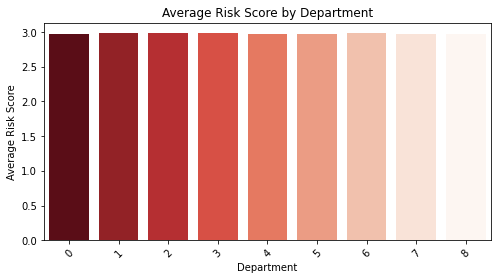

In [54]:
# 1. Cohort-level risk summary
# ------------------------------
cohort_summary = df_work.groupby("department")["risk_score"].mean().sort_values(ascending=False)
print("Average Risk Score by Department:")
print(cohort_summary)

plt.figure(figsize=(8,4))
sns.barplot(
    x=cohort_summary.index,
    y=cohort_summary.values,
    hue=cohort_summary.index,   # tell seaborn to color by department
    palette="Reds_r",
    legend=False                # hide redundant legend
)

plt.xticks(rotation=45)
plt.title("Average Risk Score by Department")
plt.ylabel("Average Risk Score")
plt.xlabel("Department")
plt.show()

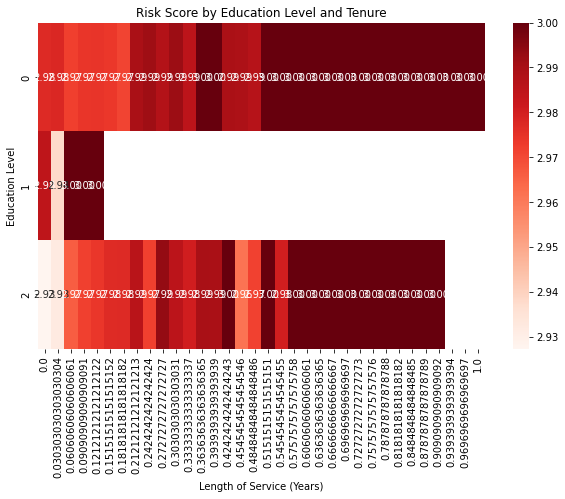

In [55]:
# 2. Heatmap for multi-factor risk (education vs tenure)
# ------------------------------
heatmap_data = df_work.pivot_table(
    index="education",
    columns="length_of_service",
    values="risk_score",
    aggfunc="mean"
)

plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, cmap="Reds", annot=True, fmt=".2f")
plt.title("Risk Score by Education Level and Tenure")
plt.ylabel("Education Level")
plt.xlabel("Length of Service (Years)")
plt.show()

In [56]:
# 3. Human-readable rule extraction
rules = []

if (df_work["avg_training_score"] < 60).mean() > 0.3:
    rules.append("⚠ Employees with low training scores (<60) are at higher risk.")

if (df_work["length_of_service"] < 3).mean() > 0.2:
    rules.append("⚠ Employees with tenure under 3 years show higher likelihood of leaving.")

if (df_work["awards_won"] == 0).mean() > 0.5:
    rules.append("⚠ Employees without recognition (awards) are less engaged and more likely to leave.")

print("\nKey HR Takeaways:")
for r in rules:
    print(r)


Key HR Takeaways:
⚠ Employees with low training scores (<60) are at higher risk.
⚠ Employees with tenure under 3 years show higher likelihood of leaving.
⚠ Employees without recognition (awards) are less engaged and more likely to leave.
